# Electrification impact in Goma

The following survey data aims to be used to assess the impact of electrification for two villages close to Goma, the survey was conducted in June 2022.

Electrification has many benefits for the people that gain access to it, such as:

* alleviate women’s time poverty
* create opportunities for women and girls to enter the labor force or school
* decrease exposure to harmful indoor air pollutants
* improve maternal health
* reduce exposure to and acceptance of gender-based violence
* hange social norms through access to information
* reduce energy bills
* allows access to safe potable water

According to [Journal Public and International Affairs](https://jpia.princeton.edu/news/powering-households-and-empowering-women-gendered-effects-electrification-sub-saharan-africa#:~:text=Findings%20indicate%20that%20electrification%20can%20alleviate%20women%E2%80%99s%20time,and%20change%20social%20norms%20through%20access%20to%20information)






# Section 0 .Install and import required Packages and functions

### Package installations

In [1]:
# for the tree visualization
! pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 5.0 MB/s eta 0:00:00


In [2]:
# for the data profiling
!pip install pandas_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.


In [3]:
# for the translation
!pip install deep_translator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00


In [4]:
# to get sentence embeddings
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=aa4184f86b801a3e12d5f6dafb4725239cd25592321c09caa7975976705857a4
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [5]:
# install library to get kmeans
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [6]:
# Install library for clustering and random forests
!pip install -U scikit-learn

In [7]:
# Install library for boxplots on feature imp of hours of electriticy per benefit topic

!pip install seaborn

#### Imports

In [8]:
# Required packages to run the notebook
from fastai.imports import *
np.set_printoptions(linewidth=130)
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from subprocess import check_output
from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer

# import seaborn for bloxpot of impacts of electricity

import seaborn as sns

# import libraries for clustering and measure silhouette score to define best cluster size

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


pd.options.display.max_rows = 20
pd.options.display.max_columns = 8


In [9]:
from sklearn.metrics import accuracy_score,r2_score

In [10]:
from sklearn.ensemble import RandomForestClassifier

#### Functions

In [11]:
# function to create random forests

def rf(xs, y, n_estimators=20, max_samples=100,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True,random_state=123).fit(xs, y)

In [12]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)


# 1. Questions related to the questionnaire?

    1. Sampling of population and sample size (is it well stratified and representative?)
    2. Criteria to selection of questions (does the science literature back up those variables?)
    3. What are the information that we are planning to extract with those questionnaires?
    4. Are there key drivers of the impacts included?

# 2. Data Processing and Profiling


In this section, the goal is the get a quick overview of the data and load it as a pandas data frame. First we will locate the path in kaggle folder, later import, and last do the data profiling, note that at this point no data processing took place.

In [13]:
# get the path of the file from my kaggle profile session 
print(check_output(["ls", "../input"]).decode("utf8"))

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

d

/kaggle/input/d/alanpoe4688/energy-panel/sample_data.xlsx


In [14]:
# read Goma's tab and import as data frame
df = pd.read_excel('/kaggle/input/d/alanpoe4688/energy-panel/sample_data.xlsx', sheet_name='202206_goma')

In [15]:
# run profile report (To keep notebook print short I commented this section)
#df.profile_report()

## 2.1 Observations from data profiling:



1. Around 15 columns, related to fuel use are constant and show always False.
2. Questions related to the benefits of electricity and problems of not having electricity are highly cardinal and require postprocessing, ideally with text embeddings to make it comparable
3. The main source of electricity or fuel is highly imbalanced, as well as water source location, among other 19 variables
4. Need to reformat age, years in town, time to get water, money spend on healthcare, people with mosquito net, malaria cases, study hours children in the evening, hours of electricity availability, money per month spend on electricity, money spend per month on energy sources, male adults with bank account, female adults with bank account, money receive from outsider sources. Those columns are unsupported and may need reformating to be analysed. They are all numerical, althought with different units of measurement.
5. Zero values are not necessary wrong cases, as they refer all to numerical columns that can have 0 value.
6. There are potentially important columns with a substantial amoount of missing values

Main Action : make sure all unsupported columns have the right format for a successful data profiling.

7. After the processing of unsupported columns, we identified very strong correlation between money and time using electricity and their cost, which is expected.

#### Please note: we harcoded different values that relate to missing info such a refused to respond, no answer, and unkown. We choose numeric replacements as this is a requirement for each column to have a single format (at the end all levels will be processed as numvers by the random forests. Negative values has been use to avoid encoding for example as 0, which will lead to the missinterpretation of actual 0s and missing responses. More generic approaches can be use for production applications, based on dictionaries.

In [16]:
# Reformat each unsupported column by replacing all missing by 0 
unsup_col_list = ['What is your age?','How many years have you lived in this town?',
                  'How long does it take for members of your household to go there, get water, and come back? (minutes)',
                  'On average, what is the monthly income of this household?',
                  'On average, in a month, how much money  does your household spend on healthcare - visiting doctors, getting medicine etc.? (US $)',
                  'How many people in this household slept under a mosquito bednet last night?',
                  'In the past month, how many people in your household have become sick with Malaria?',
                  'On average, how many hours in the evening do the children living in this household spend on study or homework?',
                  'On average, how many hours a day is electricity available in your household?',
                 'On average, how much per month does your household spend on electricity? (US $)',
                 'On average, how many hours a day does your household spend on collecting or arranging fuel/energy sources?',
                 'On average, how much per month does your household spend on energy sources? (US $)',
                 'How many male adults in the household have a bank account or mobile money account?',
                 'How many female adults in the household have a bank account or mobile money account?',
                 'If yes, on average how much money per month does your household get from this outside source? (US $)']

for i in unsup_col_list:
    df[i].replace('Refused to respond', -1, inplace=True)
    df[i].replace('No answer', -2, inplace=True)
    df[i].replace('Unknown', -3, inplace=True)
    df[i].fillna(-3)
    df[i] = df[i].replace('nan', np.nan).fillna(-10)
    df[i] = pd.to_numeric(df[i])
    df[i] = df[i].astype(int)





In [17]:
# validate we change the format for profiling
df.loc[:, df.columns.isin(unsup_col_list)].dtypes

What is your age?                                                                                                                    int64
How many years have you lived in this town?                                                                                          int64
How long does it take for members of your household to go there, get water, and come back? (minutes)                                 int64
On average, what is the monthly income of this household?                                                                            int64
On average, in a month, how much money  does your household spend on healthcare - visiting doctors, getting medicine etc.? (US $)    int64
How many people in this household slept under a mosquito bednet last night?                                                          int64
In the past month, how many people in your household have become sick with Malaria?                                                  int64
On average, how many hours 

In [18]:
# run profiling only for those columns  (KEEP commented this section to keep the notebook easy to read)
# one can uncomment the code snippets below to reproduce results

#df_unsup = df.loc[:, df.columns.isin(unsup_col_list)].copy() #https://stackoverflow.com/questions/53496821/why-do-i-get-a-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy-of-a#:~:text=SettingWithCopyWarning%3A%20A%20value%20is%20trying%20to%20be%20set,instead%20See%20the%20caveats%20in%20the%20documentation%3A%20http%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Findexing.html%23indexing-view-versus-copy
#df_unsup.profile_report()

# 2.2 Dealing with hard cardinal columns with embeddings

Our goal is here is to be able to use all columns to analyze the reliabiliy of panel responses to assess social impact of electrification, for that purpose, we want to make the two questions that openly ask about main benefits and problems of having/not having electricity. One way to do it is to transform the free text into a vector that keeps its semantic meaning, while making it comparable using for example cosine distance or clustering as a criteria to group responses. We will encode in this case each response, after its translation to english into embeddings, to later group them via kmeans clustering. The optimal number of clusters are based on the change in the silhouette score. 

#### Important Note: Even if there are multilingual models and definitely models in french, for the ease illustration we will translate the simple text to english and use sentence bert, [recommended for semantic similarity](https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1) . Given the simplicity of the text (is not poetic, ironic...), the translation does not risk a significant loss in meaning.




### Step 1 : Translate from French to English

In [19]:
# add no response for the blank category
df[df.columns.tolist()[99]] = df[df.columns.tolist()[99]].replace('nan', np.nan).fillna('Pas de réponse')
df[df.columns.tolist()[100]] = df[df.columns.tolist()[100]].replace('nan', np.nan).fillna('Pas de réponse')

In [20]:
#test translation model
to_translate =df.loc[108,df.columns.tolist()[99]]

[to_translate,GoogleTranslator(source='fr', target='en').translate(to_translate)]

["Éclairage, et la sécurité du quartier par l'éclairage public",
 'Lighting, and neighborhood safety through public lighting']

#### Note: the index of the column has been hardcoded, again, the ideal approach is to create a function and pass the desired columns as parameters. Due to time constraints and only for illustration purposes we keep it like that. 

In [21]:
[df.columns.tolist()[99],df.columns.tolist()[100]]

['What are the biggest benefits of having electricity available in your household? ',
 ' What are the biggest problems with not having electricity available in your household?']

In [22]:
# initialize i to zero
i= 0
# translate to english all text, in case there is another language we set autodetect
for i in list(range(1, len(df.index))):
        to_translate = df.loc[i,df.columns.tolist()[99]]
        df.loc[i,df.columns.tolist()[99]] = GoogleTranslator(source='fr', target='en').translate(to_translate)
        to_translate = df.loc[i,df.columns.tolist()[100]]
        df.loc[i,df.columns.tolist()[100]] = GoogleTranslator(source='fr', target='en').translate(to_translate)

### Step 2 : get sentence embeddings



In [23]:
# Import language model 
model = SentenceTransformer('bert-base-nli-mean-tokens')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tensorflow13GcsFileSystemE']


In [24]:
# Create embeddings for both columns
# TO DO : reduce to one call
sentences1 = df[df.columns.tolist()[99]]
sentence_embeddings_1 = model.encode(sentences1)
sentences2 = df[df.columns.tolist()[100]]
sentence_embeddings_2 = model.encode(sentences2)
sentence_embeddings_1.shape
sentence_embeddings_2.shape


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

(194, 768)

### Step 3: perform cluster analysis to evaluate if there are clear differentiated benefits or problems




#### Note on method selection :Althought tsne is very popular for visualization of embeddings, as here the goal is to encode as much information as possible (hence not reducing dimensions from original representation), we stay with the clustering using all embeddings. This is possible because we have only 200 observations, with more than 100k data respondents, the computation require will make PCA and TSNE better options than K-means for all embeddings. We will use here a grid of 2,3,5,10,15,20,25 clusters and decide the cut based on the [silhouette score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) 

#### Results : 

* As we will see below, there is little difference in the responses. This is shown by the little improvement in the silhouette score of increasing cluster sizes. 
* A close look at the data shows that the main benefit reported is lighting as well as the usage of devices, and the problems reported are lack of light and not using devices, with more details and hence more clusters. 
* This shows the importance of having the potential benefits (lower money spend, more education enrollment) and challenges (safety, lack of access to water) in other questions in this questionnaire explcitely stated, and not expected respondants to give all proven benefits of electrification.
* Note though that in both cases we have a proportion of empty answers which are clearly separated, and the rest refers to the need for lighting and enable the use of devices. The lack diversity in the answers and benefits and problems make topic model not so relevant here, but in another questionnares the same approach could allow us to nicely separate topics if they exist.
* We will go for 2 clusters for benefits (one for not answer and one for lighting) and 20 for problems(not answer, lighting, safety, devices, entertainment kids...). This is due to stagnation of the silhouette score at 2 and 20 respectively

 .

In [25]:
range_n_clusters = [2,3, 5,10,15,20,25,30]

In [26]:
# assign sentence embeddings for benefits of electricity to X
X = sentence_embeddings_1.copy()

The following loop over the cluster grid provides a visualization of the silhouette score for different clusters, as well as a two dimensional representation of the observations. 

This code snipped is repeated for the embeddings of problems due to lack of electricity, this is clearly something to eliminate by creatinga function while refactoring the code,

For n_clusters = 2 The average silhouette_score is : 0.62817293
For n_clusters = 3 The average silhouette_score is : 0.61574507
For n_clusters = 5 The average silhouette_score is : 0.61422205
For n_clusters = 10 The average silhouette_score is : 0.62716955
For n_clusters = 15 The average silhouette_score is : 0.6378365
For n_clusters = 20 The average silhouette_score is : 0.6399916
For n_clusters = 25 The average silhouette_score is : 0.6492863
For n_clusters = 30 The average silhouette_score is : 0.64912105


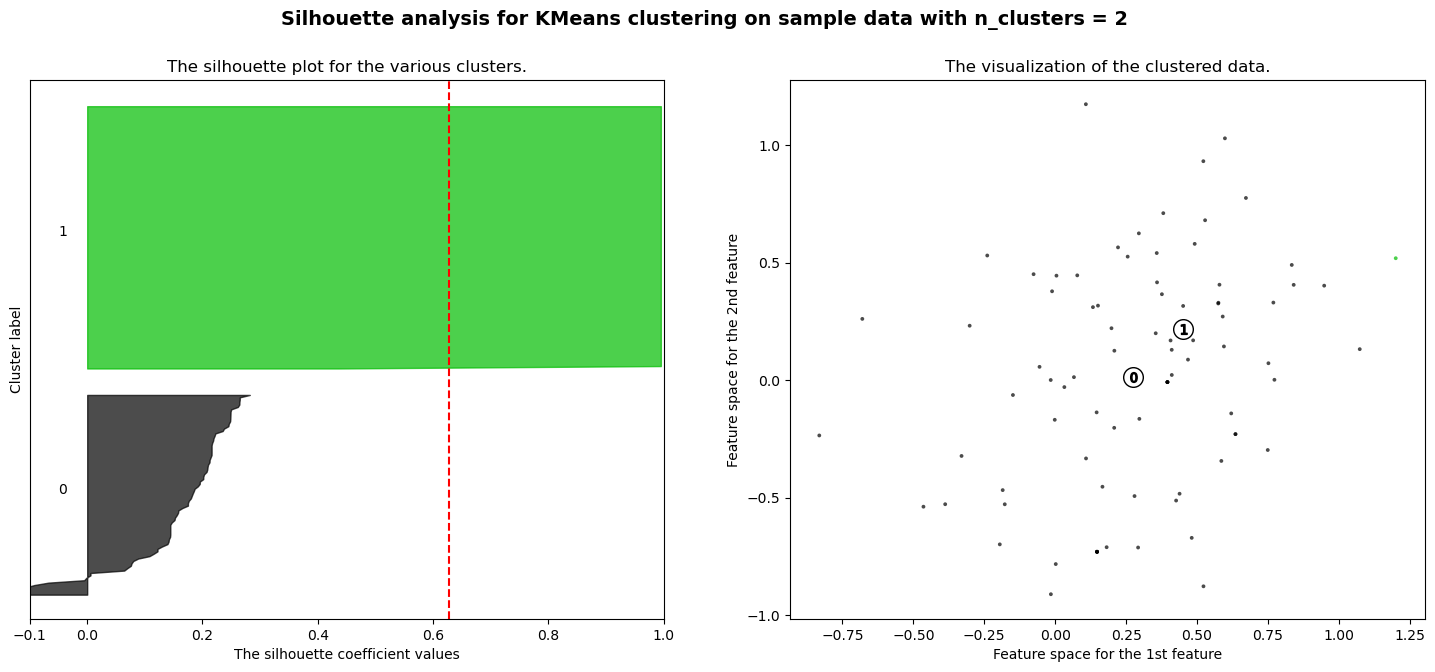

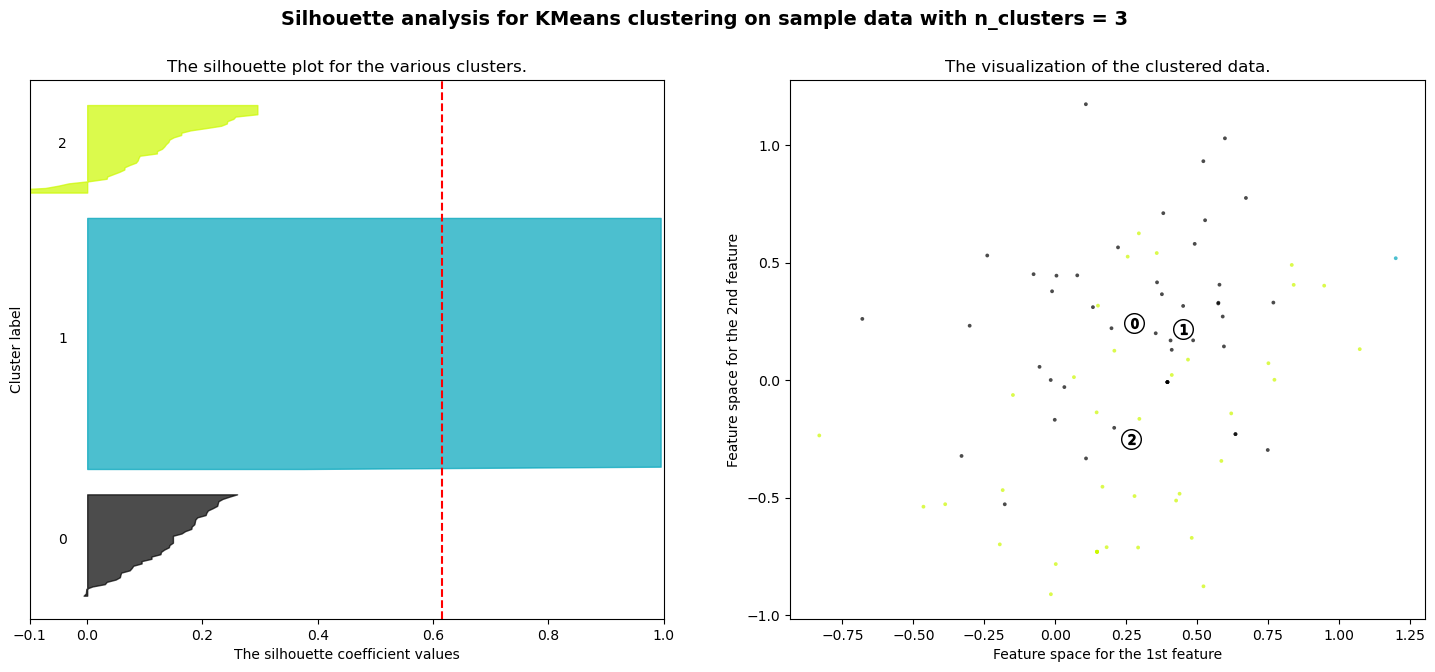

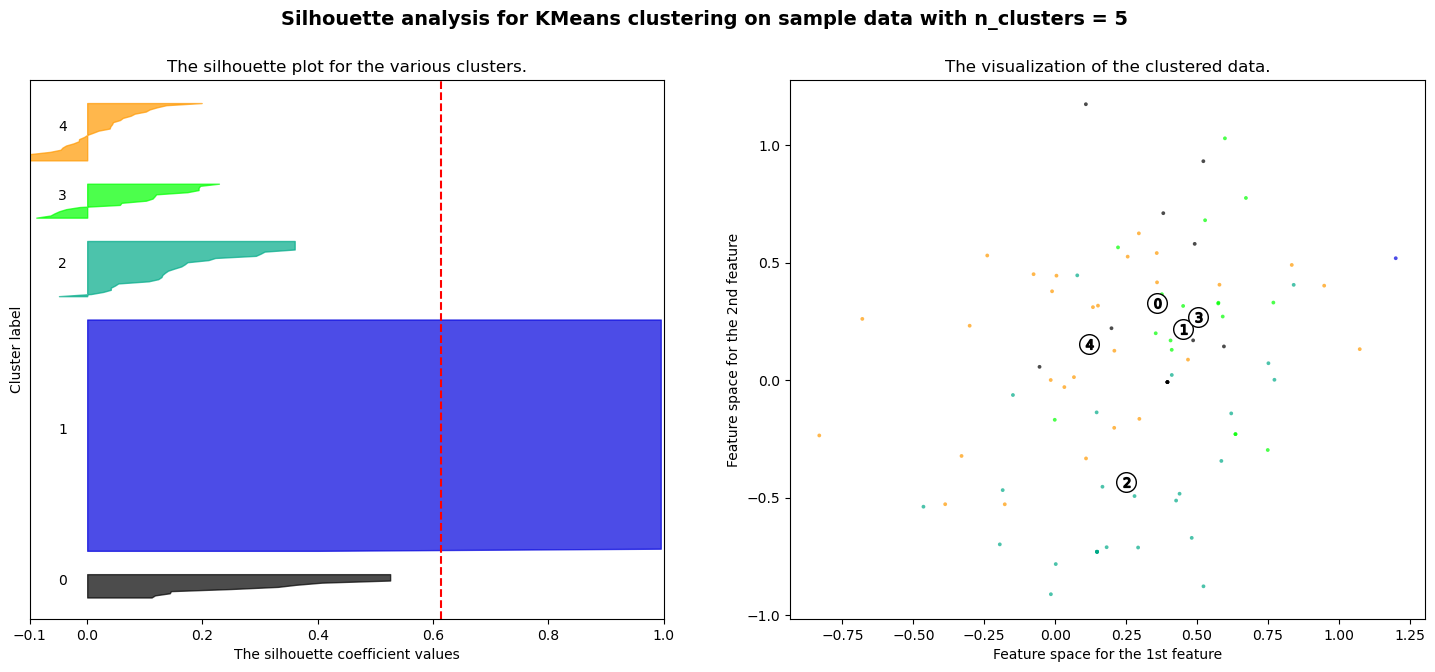

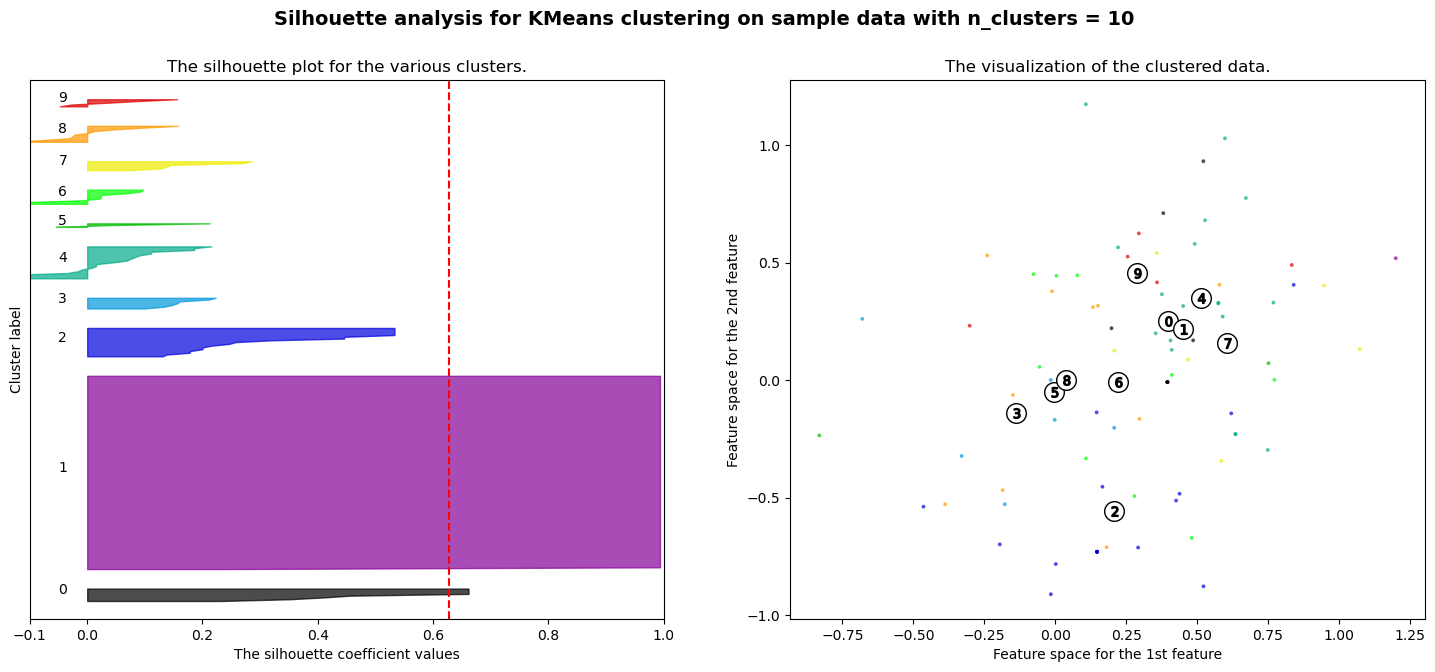

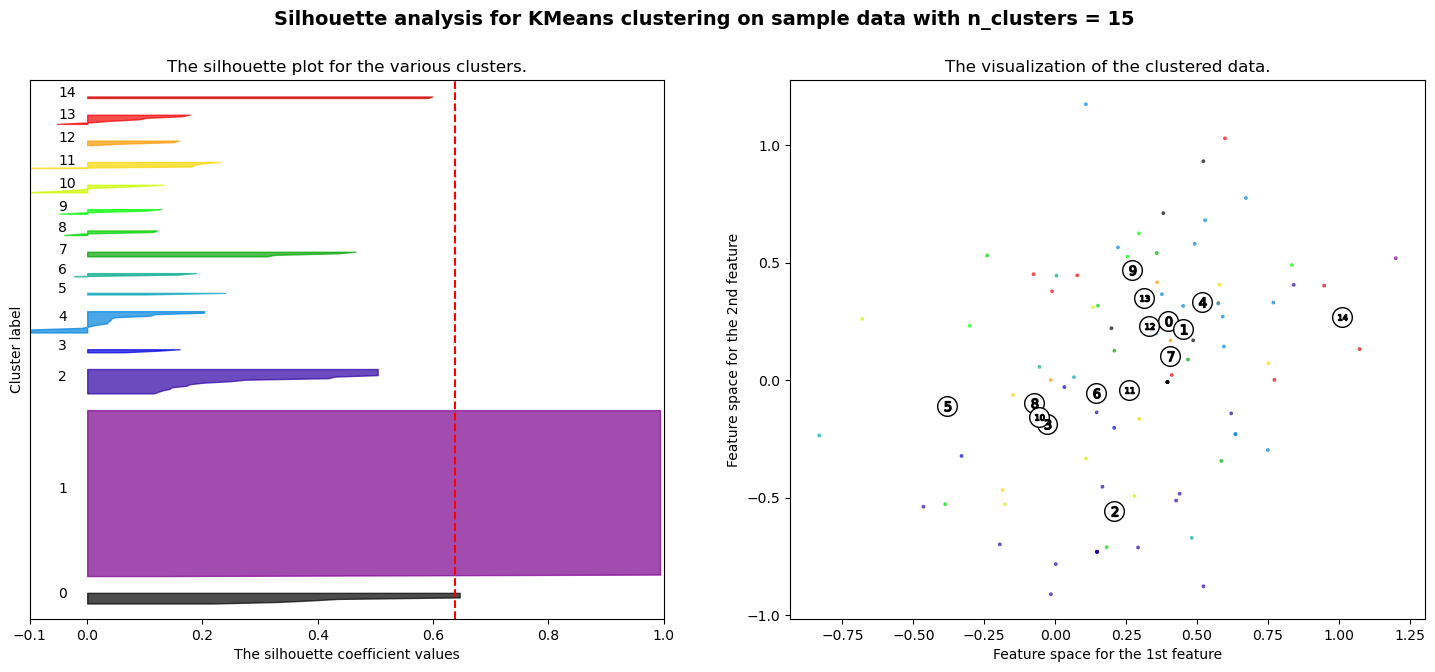

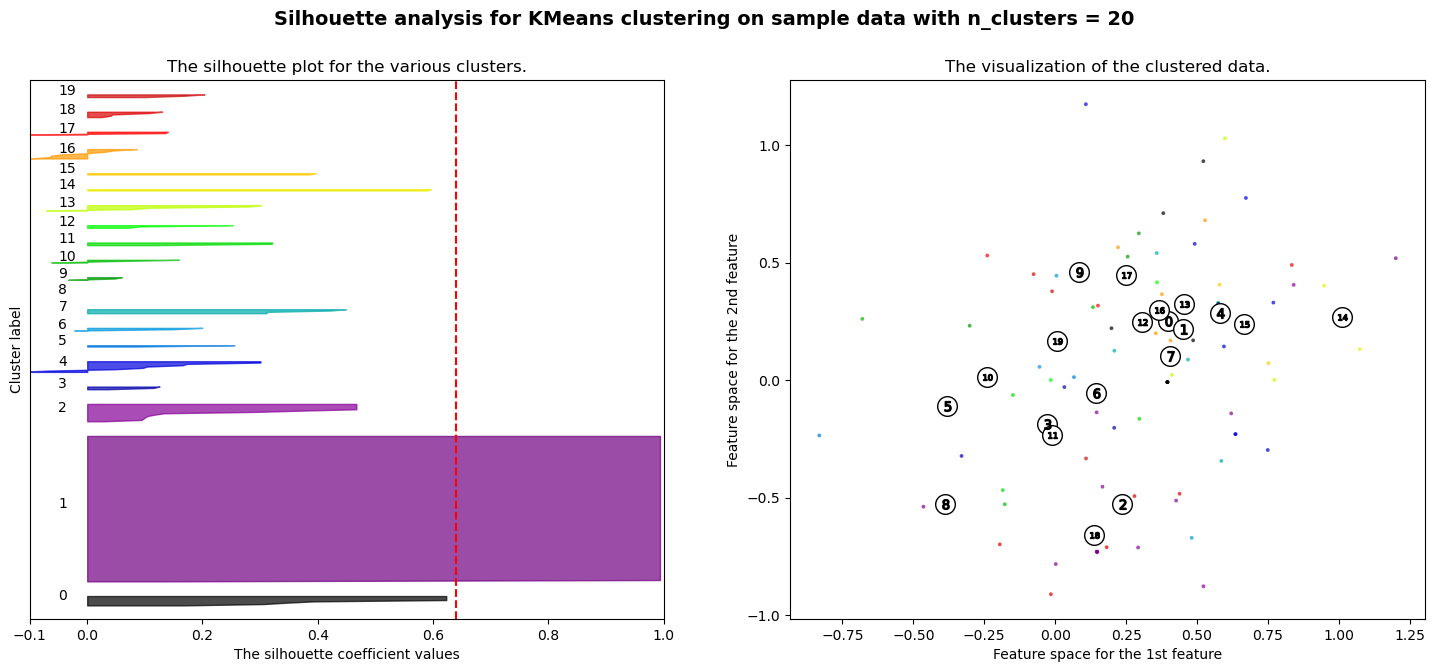

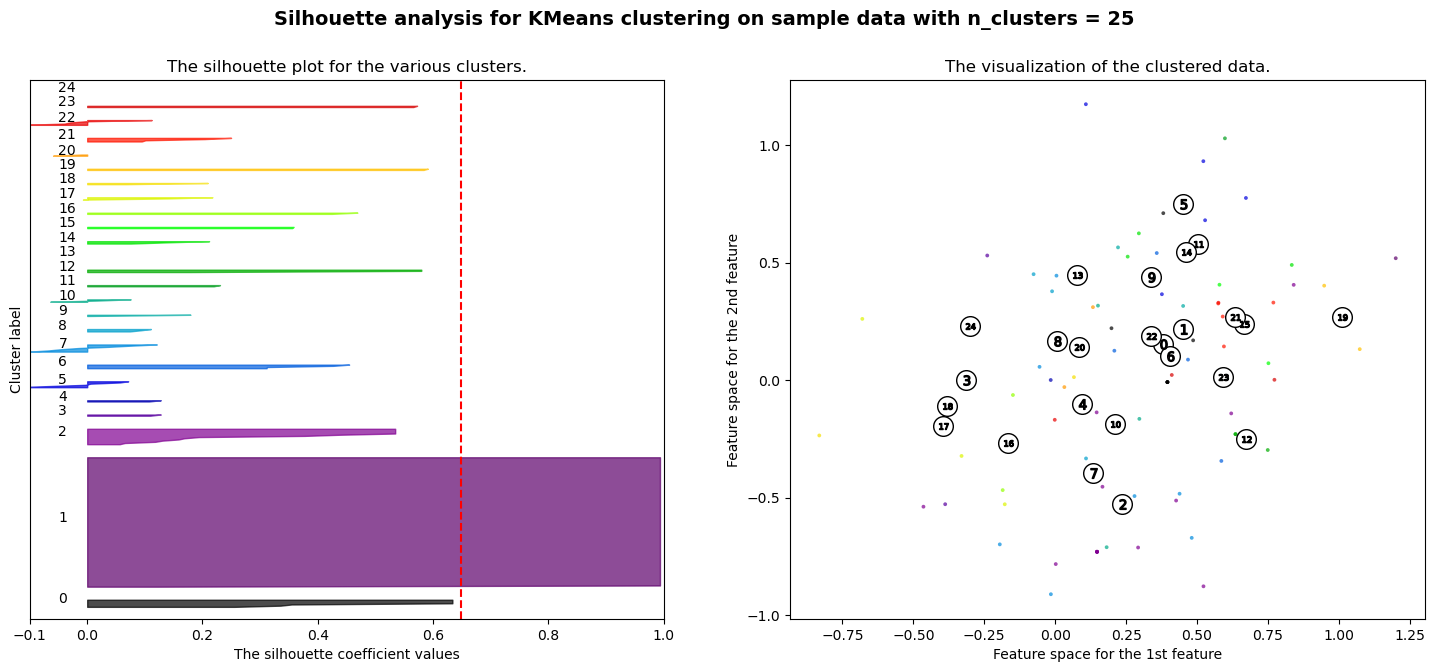

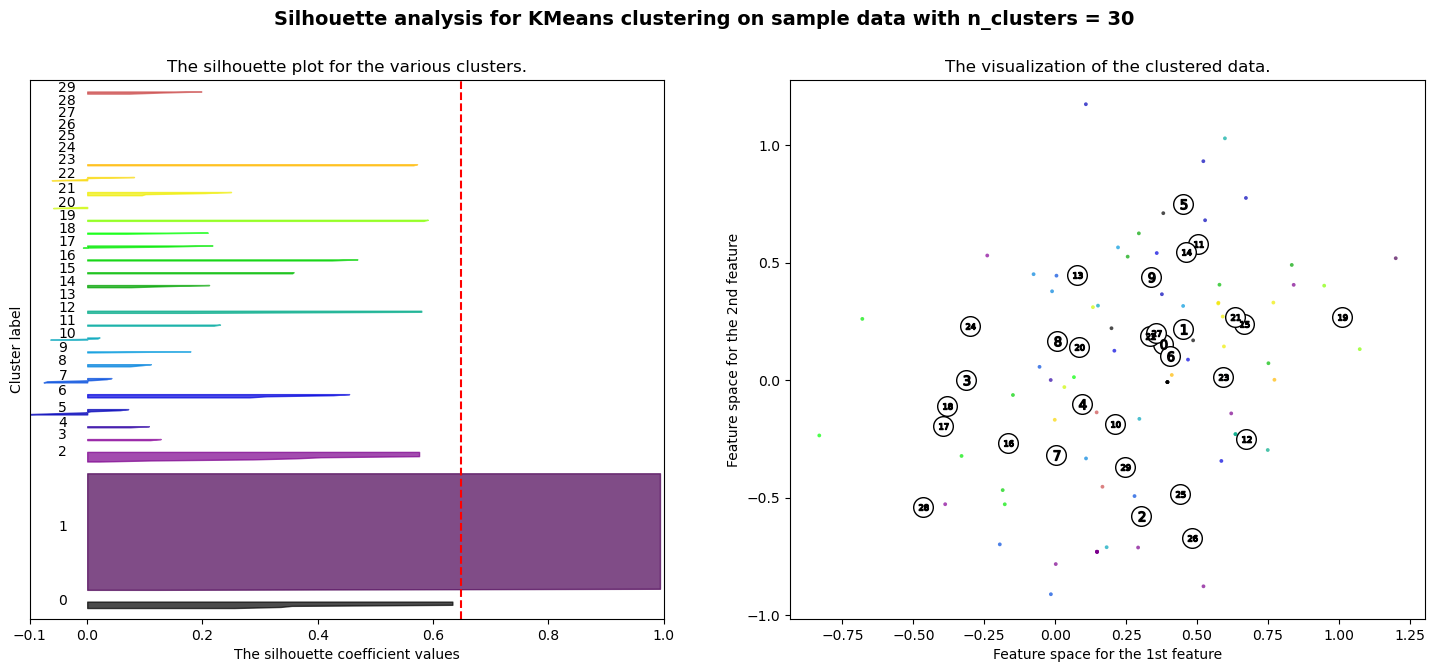

In [27]:
# For the the grid of clusters plot silhouette scores and two dimensional cluster validation
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [28]:
# results for problems of not having electricity
X = sentence_embeddings_2

For n_clusters = 2 The average silhouette_score is : 0.4556392
For n_clusters = 3 The average silhouette_score is : 0.443802
For n_clusters = 5 The average silhouette_score is : 0.47728628
For n_clusters = 10 The average silhouette_score is : 0.494586
For n_clusters = 15 The average silhouette_score is : 0.5416866
For n_clusters = 20 The average silhouette_score is : 0.55144566
For n_clusters = 25 The average silhouette_score is : 0.54242116
For n_clusters = 30 The average silhouette_score is : 0.56338257


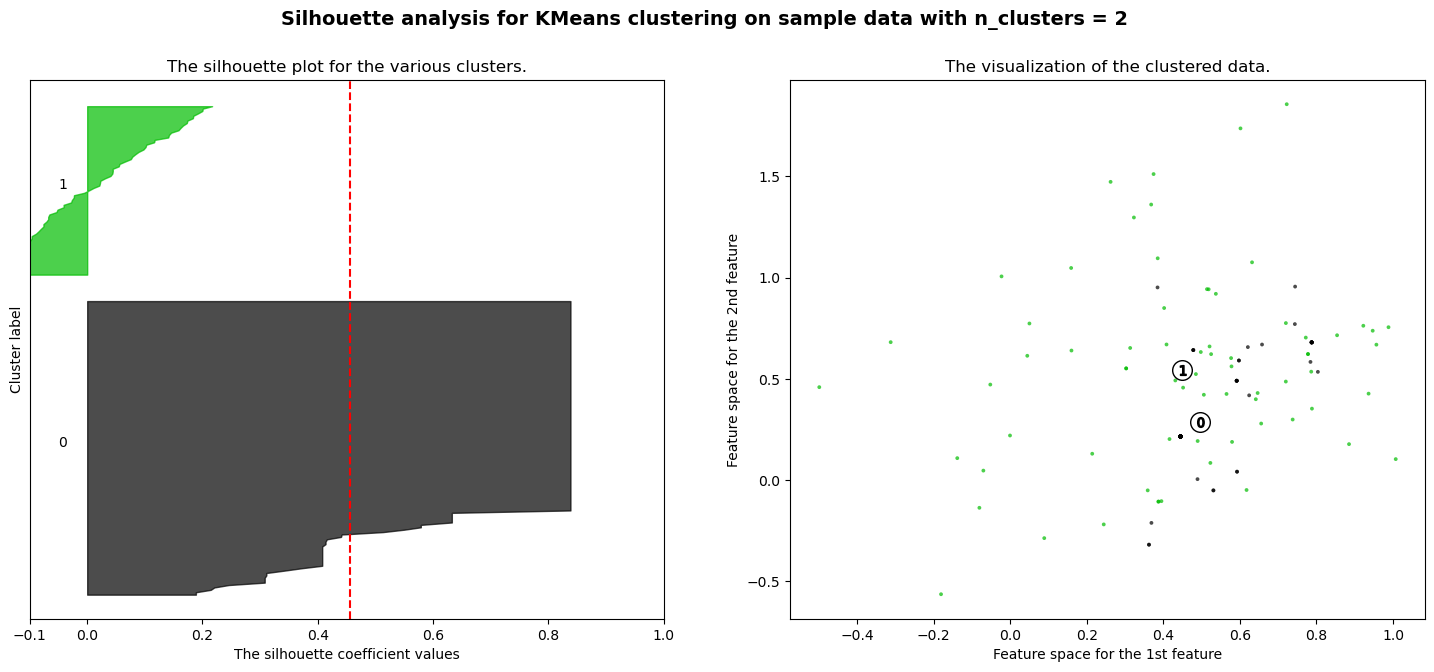

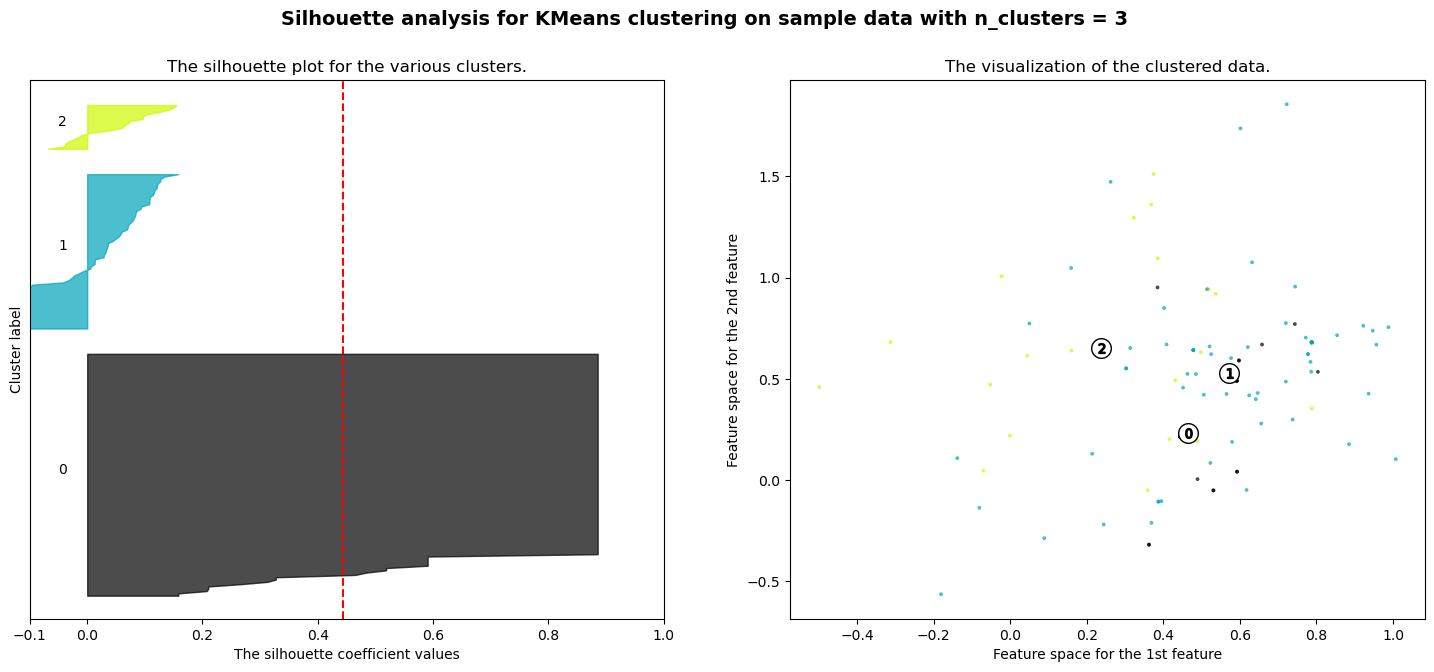

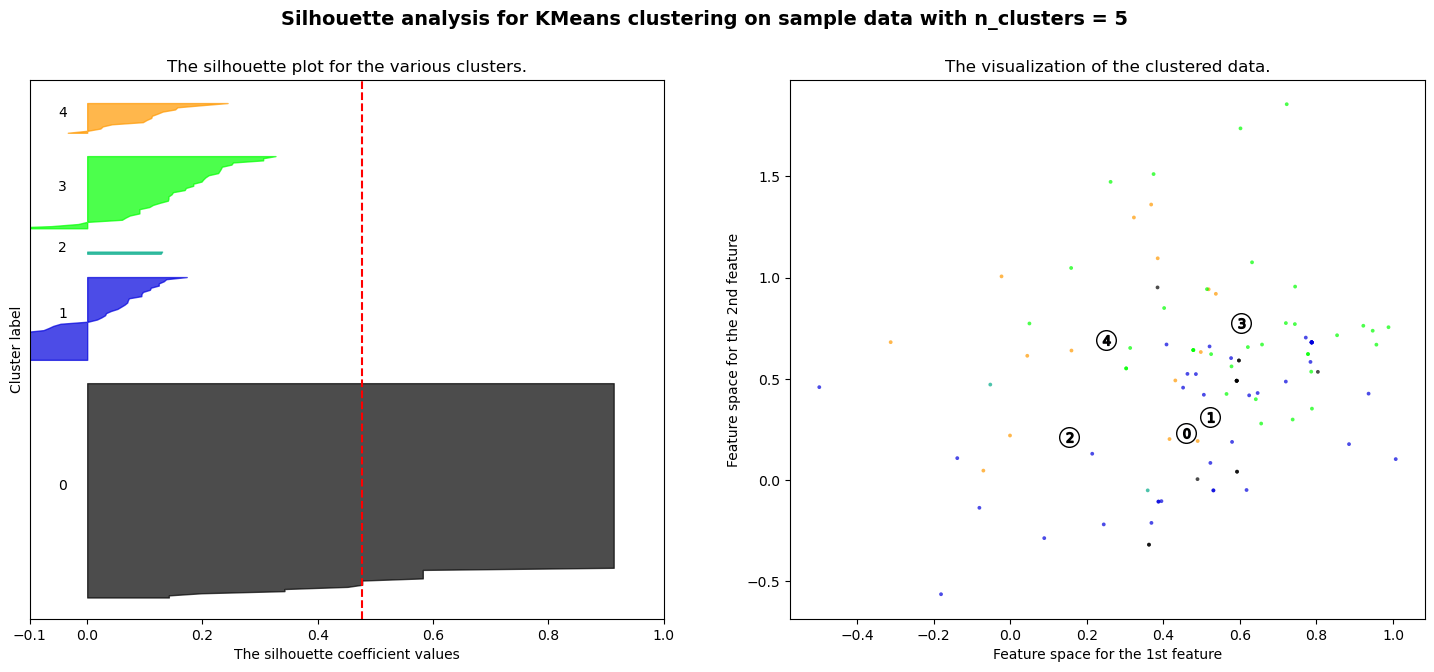

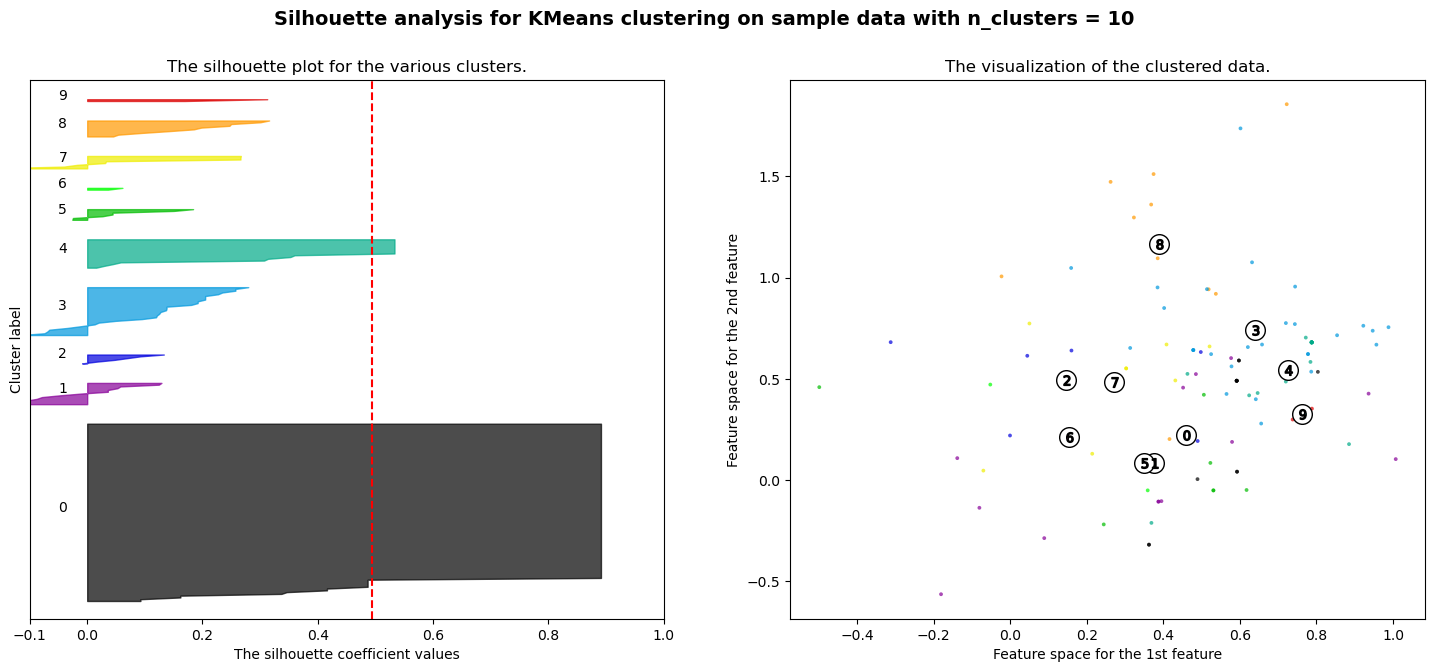

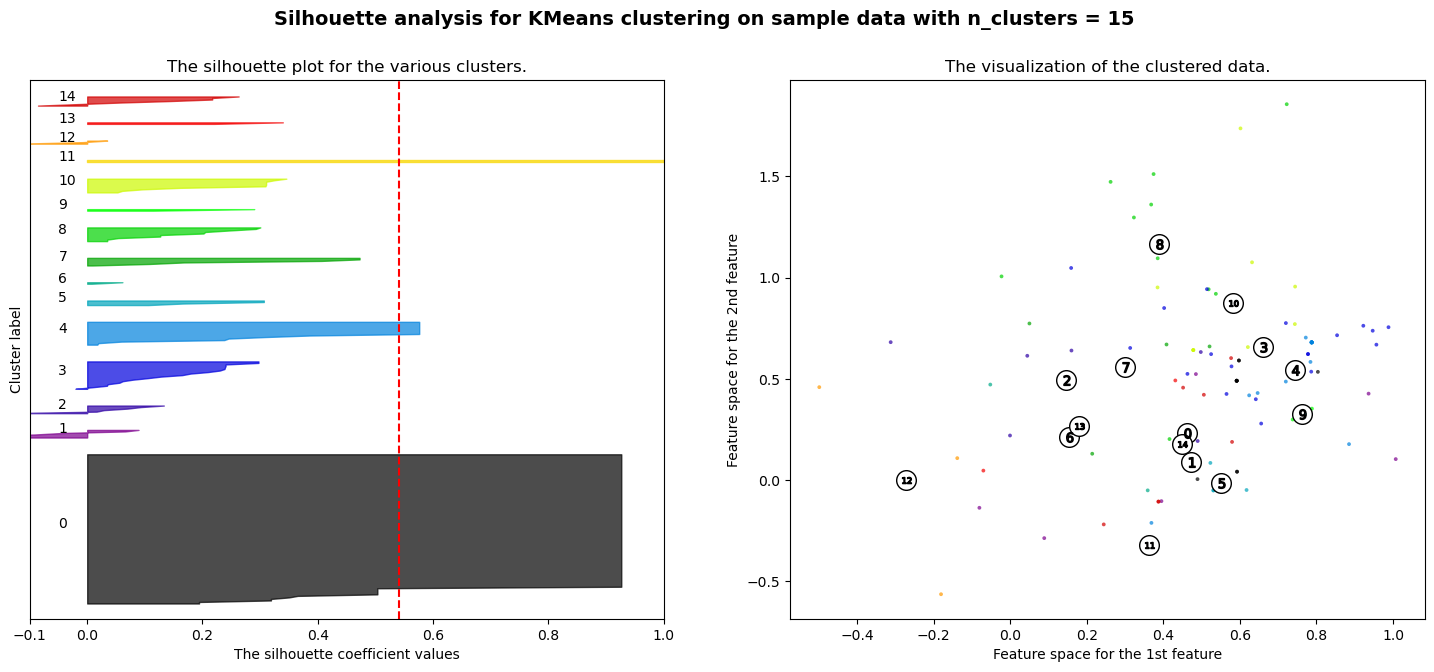

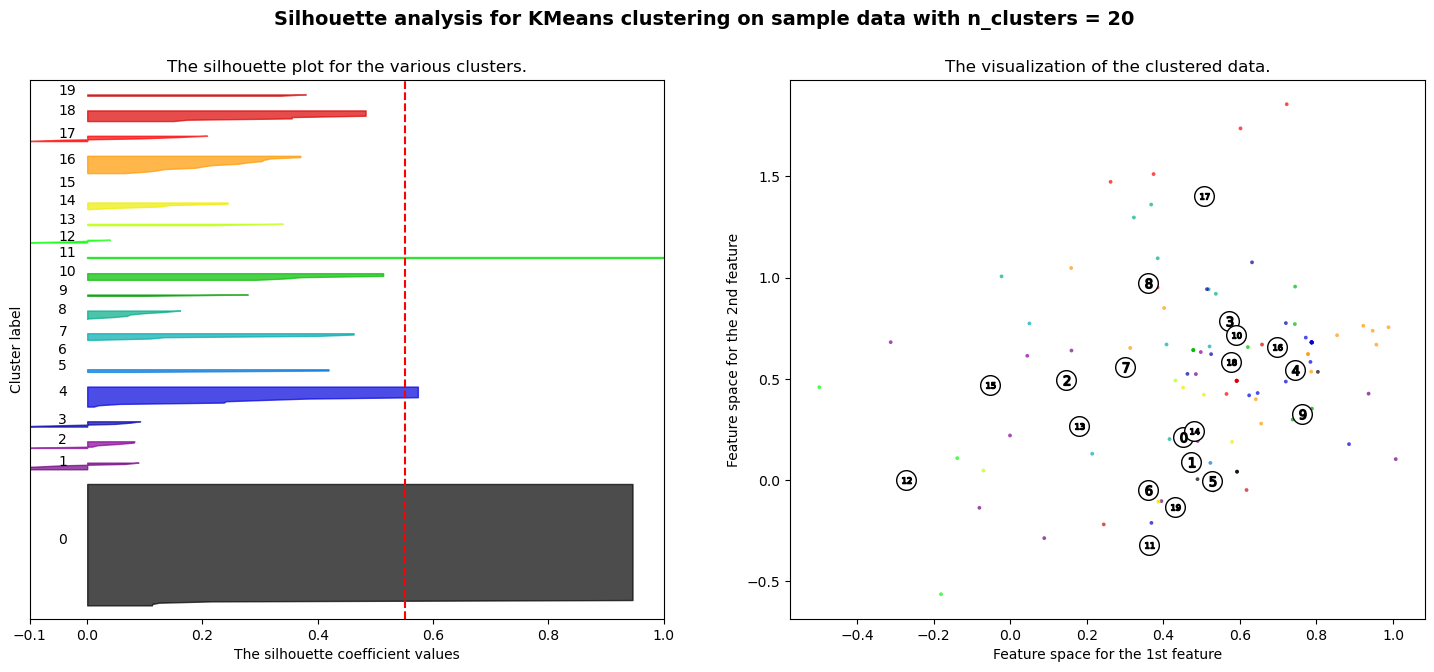

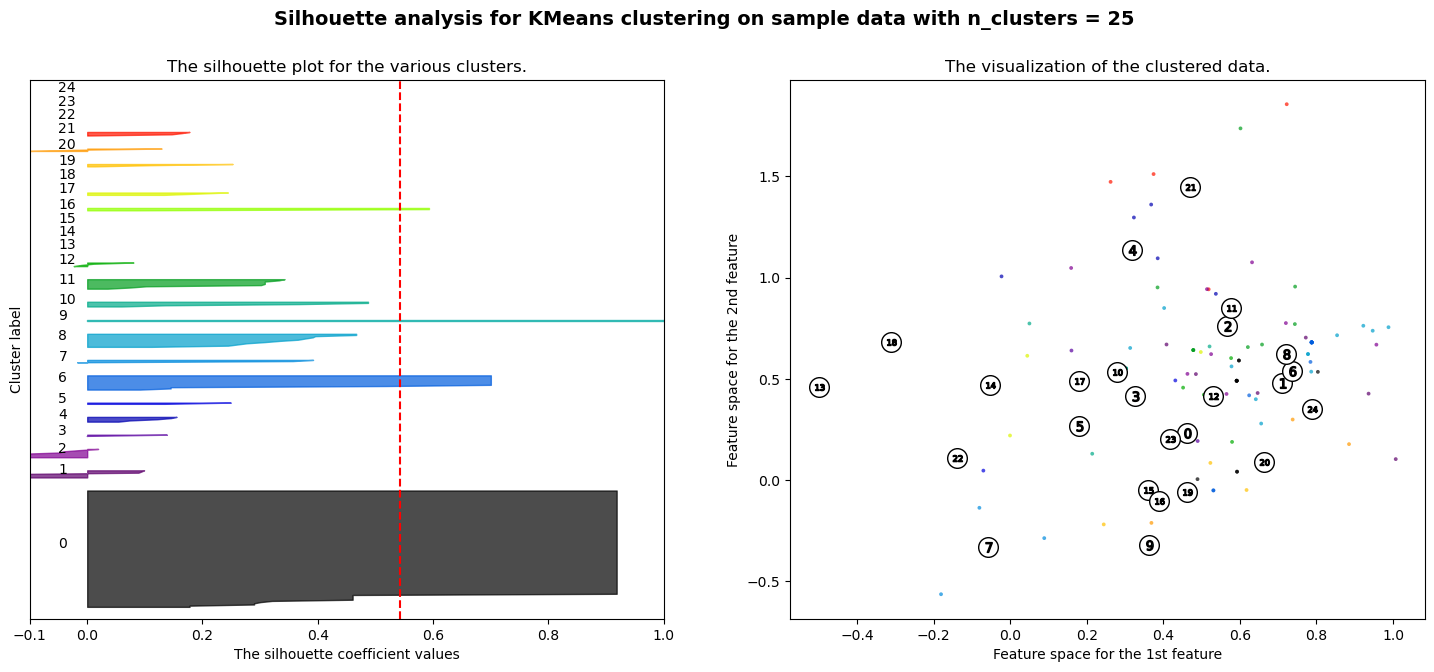

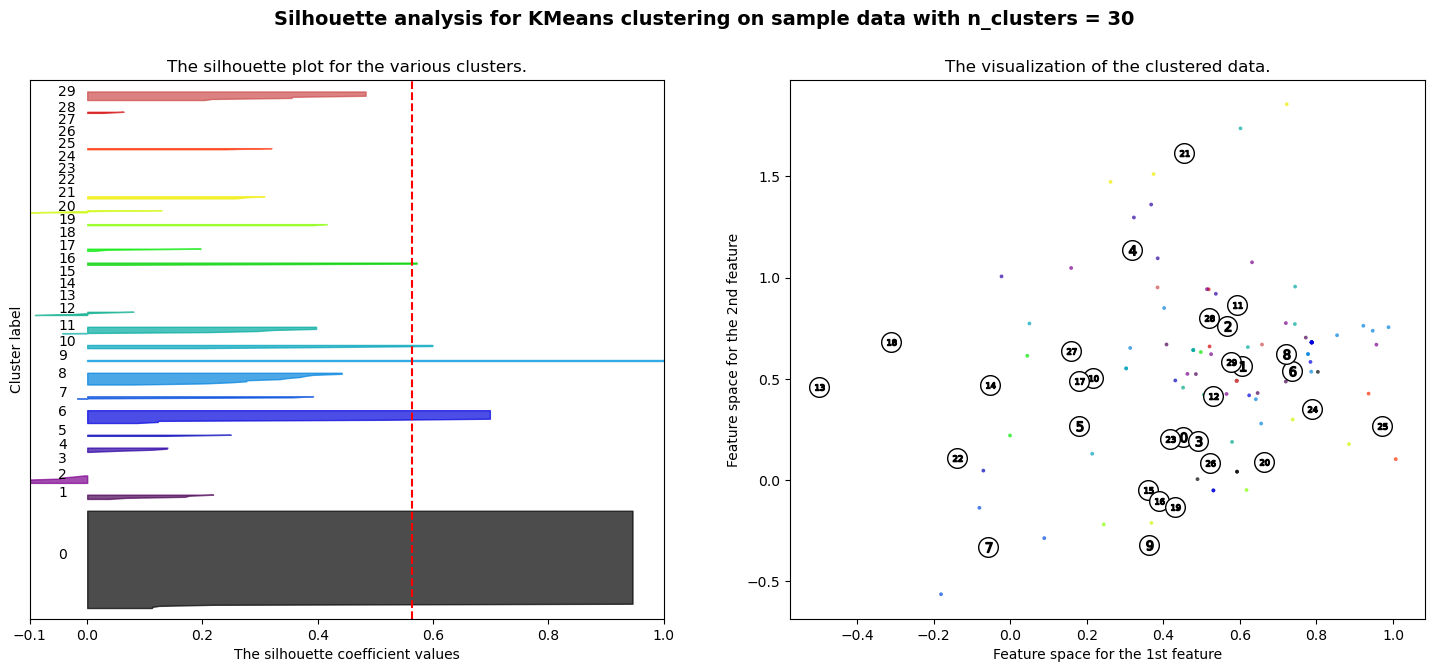

In [29]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Decision: based on the results and visualizations, we keep 2 clusters for benefits (one means no benefits reported and the other mainly lighting and electric device use, for problems 15 (one for missing data, the others are mainly on lighting, with the references to safety, kids time to learn of enjoy tv entertainment...). 

### Step 4: map each benefit and problem with the cluster, save the results for evaluation




In [30]:
kmeans_benefits = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(sentence_embeddings_1)
kmeans_problems = KMeans(n_clusters=15, random_state=0, n_init="auto").fit(sentence_embeddings_2)
#kmeans_benefits.labels_
len(kmeans_benefits.labels_) ,len(kmeans_problems.labels_)


(194, 194)

In [31]:
# Map the clusters to each observation, for the simplicity of the flow we overwrite original text
df[df.columns.tolist()[99]] = kmeans_benefits.labels_
df[df.columns.tolist()[100]] = kmeans_problems.labels_

# 3. Detecting Outliers and suspicious responses

One of the challenges here is to detect which are the answers suspicious to be either an outlier (a value well beyond the normal), or simply an answer that is either inconsistent or suspicious to be false. Here the proposal is an approach that could be generalized to any questionnaire, asumming all variables has been processed as we have done. 

#### Method: we can use all other questions's answers to predict the outcome of our target question. The assumption is that when a question is very predictable (above 97.5% accuracy or variability explained), those mistakes in the model can be labeled as suspicious answers. 


We will define as suspicious panels those that are in multiple questions (that we can accurately predict) are labeled as outliers. For the sake of this exercise, we deep dive into those outliers, given the results obtained, one can use this automatically to filter suspicious panels from the impact analysis.

### 3.1 Step one, run loop of random forests

Random forests are a good approach for fast and accurate predictions on tabular data, they are a simply an emsemble of trees that use a random sample of data and variables and we average the predictions. In case it is desired, variable importance and waterfall plots can be use to better understand how the model manage to predict our target variable. In this case, when the target question is categorical we use as a metric the accuracy (exact match of outcomes), while for continuous questions we use rsquared as a filter and to label errors 10% absolute divergence with the actual value. 

#### Note: In the following function rf, the number of esimators is reduced to 20 to avoid overfitting.

In [32]:
# The following workflow will be used to store the r2 of each question to identified those 
# where we can clearly identified outliers

# to reduce the code to the minimum and preprocessing steps, we leverage Tabular pandas from fastai

procs = [Categorify, FillMissing] # performs automatic categorization and fill missing values 
df = df.fillna(-3) # in case we miss any na, we labelled and unkown value as previosly -3



#Detect those columns where we find a model that is 95% accurate or more on the validation set
accurate_columns = [] # store the columns that are accurate as a list
acc_level = [] # store accuracy levels
false_pred_count = df.copy() #with the same format as the df, stores false classifications as True, otherwise False
columns = df.columns.tolist()
false_pred_count['index'] = df['_index'].copy() # Copy the index to use it as key to map data without the risk of false mapping due to shuffling


# Start the loop

for c in columns:
        dep_var = c # define target variable
        cont,cat = cont_cat_split(df, 1, dep_var=dep_var) # split categorical from numerical vars
        to = TabularPandas(df, cat, cont, y_names=dep_var) # create tabular pandas, a pandas with all info encoded as numeric for training a random forest
        m = rf(to.xs, to.y) # use function rf, random forest on all training data and on a moving target column
       
        if df[c].dtypes == 'O': # IT IS ASSUME ALL CATEGORICAL VARIABLES ARE CLASSIFIED AS OBJECT CLASS1
            acc = accuracy_score(to.y, m.predict(to.xs))
            errordf = pd.DataFrame(list(zip(to['_index'],(to.y != m.predict(to.xs)))),columns = ['index','errorbol'])
            false_pred_count[c] = pd.merge(false_pred_count,errordf,how='left',on = 'index')['errorbol']
        else:
            acc = r2_score(to.y, m.predict(to.xs)) # USE RSQUARED AS A PROXY FOR THE RELIABILIY OF THE MODEL
            errordf = pd.DataFrame(list(zip(to['_index'],abs(to.y - m.predict(to.xs))/to.y >0.10)),columns = ['index','errorbol'])
            false_pred_count[c] = pd.merge(false_pred_count,errordf,how='left',on = 'index')['errorbol']    
        acc_level.append(acc) # store all accuracies
        if acc >0.975:
            accurate_columns.append(c) # get the columns where model is accurate
        
     

#### Results:

* As we can see below, there are some questions where we got very good results, we can confidently use to detect panels that are suspicious of false responses. 

* Negative results are possible while using rsquared for very poor models.

(array([ 1.,  0.,  0.,  1.,  3., 10., 12., 11., 47., 37.]),
 array([-0.38778197, -0.23969261, -0.09160325,  0.05648612,  0.20457548,  0.35266484,  0.50075421,  0.64884357,  0.79693293,
         0.9450223 ,  1.09311166]),
 <BarContainer object of 10 artists>)

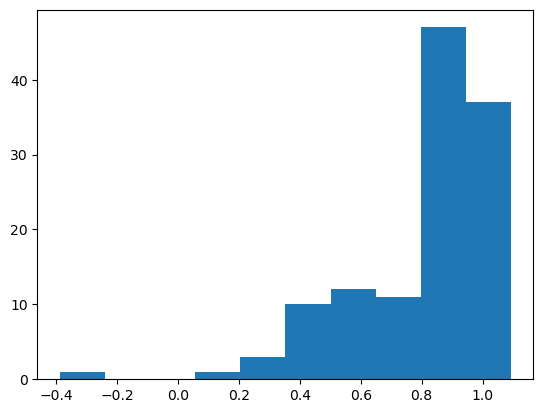

In [33]:
# plot the histogram of accuracies
plt.hist(acc_level)

### 3.2 Step 2 : count which panels concentrated most of the errors, limited to accurate columns

In [34]:
# count the number of times a panel respond in unexpected ways on accurate columns
errors_id_panel = false_pred_count[false_pred_count.columns.intersection(accurate_columns)].sum(axis=1)

# count the number of times a question
errors_id_q = false_pred_count[false_pred_count.columns.intersection(accurate_columns)].sum(axis=0)


(array([72.,  0., 93.,  0.,  0., 23.,  0.,  5.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

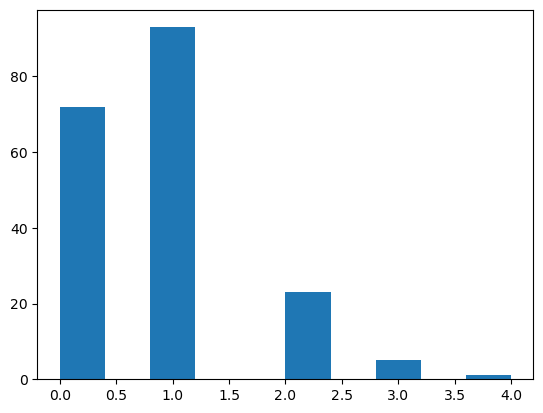

In [35]:
# only few panels have made multiple outliers, and hence suspicious of false response
plt.hist(errors_id_panel)

In [36]:
# let's get the panel index of those who make more than 3 unpredictable answers
indexes_panel = [
    index for index in range(len(errors_id_panel))
    if errors_id_panel[index] > 3
    
]

In [37]:
# let's get question index 
indexes_question = [index for index in range(len(errors_id_q)) if errors_id_q[index] >-1]

### 3.3 Step 3: analyze suspicious panels in detail

In [38]:
# Here we can analyze a particular suspicios panel by selecting the panel by index
# in this case it will be the first panel dectected

pd.set_option('display.max_columns', 1000)

# This will show the questions missclassied as True
false_pred_count.loc[indexes_panel[0], [accurate_columns[x] for x in indexes_question]]

What type of household electrification?                                                 True
Were you born in this town?                                                            False
How many years have you lived in this town?                                             True
Does your household own any mosquito bednets?                                          False
Does your household have electricity for lighting and other activities?                False
                                                                                       ...  
What sources of energy/fuel does your household use for cooking?/Garbage / Plastic     False
What sources of energy/fuel does your household use for cooking?/Sawdust               False
What sources of energy/fuel does your household use for cooking?/Other                 False
What sources of energy/fuel does your household use for cooking?/Don’t know            False
What sources of energy/fuel does your household use for cooking?/Refus

In [39]:
false_pred_count.loc[indexes_panel[0],'index']

178

In [40]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)


# see the questions answered not as predicted = True
false_pred_count.loc[false_pred_count['index'] == false_pred_count.loc[indexes_panel[0],'index'] ,accurate_columns]



,What type of household electrification?,Were you born in this town?,How many years have you lived in this town?,Does your household own any mosquito bednets?,Does your household have electricity for lighting and other activities?,"On average, how many hours a day is electricity available in your household?",Please indicate your primary source of electricity.,"On average, how much per month does your household spend on electricity? (US $)",What sources of energy/fuel does your household use for lighting?/Biogas Lamp,What sources of energy/fuel does your household use for lighting?/Gasoline Lamp,What sources of energy/fuel does your household use for lighting?/Kerosene Or Paraffin Lamp,What sources of energy/fuel does your household use for lighting?/Charcoal,What sources of energy/fuel does your household use for lighting?/Wood,What sources of energy/fuel does your household use for lighting?/Crop Residue / Grass / Straw / Shrubs,What sources of energy/fuel does your household use for lighting?/Animal Dung / Waste,What sources of energy/fuel does your household use for lighting?/Don’t know,What sources of energy/fuel does your household use for lighting?/Refused to Respond,What sources of energy/fuel does your household use for cooking?/Alcohol / Ethanol,What sources of energy/fuel does your household use for cooking?/Gasoline / Diesel,What sources of energy/fuel does your household use for cooking?/Kerosene / Paraffin,What sources of energy/fuel does your household use for cooking?/Crop Residue / Grass / Straw / Shrubs,What sources of energy/fuel does your household use for cooking?/Animal Dung / Waste,What sources of energy/fuel does your household use for cooking?/Processed Biomass (Pellets) Or Woodchips,What sources of energy/fuel does your household use for cooking?/Garbage / Plastic,What sources of energy/fuel does your household use for cooking?/Sawdust,What sources of energy/fuel does your household use for cooking?/Other,What sources of energy/fuel does your household use for cooking?/Don’t know,What sources of energy/fuel does your household use for cooking?/Refused to Respond
185,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
# See the raw data of the panel to analyze
pd.set_option('display.max_columns', 1000)
df.loc[df['_index'] == false_pred_count.loc[indexes_panel[0],'index'] ,accurate_columns]


,What type of household electrification?,Were you born in this town?,How many years have you lived in this town?,Does your household own any mosquito bednets?,Does your household have electricity for lighting and other activities?,"On average, how many hours a day is electricity available in your household?",Please indicate your primary source of electricity.,"On average, how much per month does your household spend on electricity? (US $)",What sources of energy/fuel does your household use for lighting?/Biogas Lamp,What sources of energy/fuel does your household use for lighting?/Gasoline Lamp,What sources of energy/fuel does your household use for lighting?/Kerosene Or Paraffin Lamp,What sources of energy/fuel does your household use for lighting?/Charcoal,What sources of energy/fuel does your household use for lighting?/Wood,What sources of energy/fuel does your household use for lighting?/Crop Residue / Grass / Straw / Shrubs,What sources of energy/fuel does your household use for lighting?/Animal Dung / Waste,What sources of energy/fuel does your household use for lighting?/Don’t know,What sources of energy/fuel does your household use for lighting?/Refused to Respond,What sources of energy/fuel does your household use for cooking?/Alcohol / Ethanol,What sources of energy/fuel does your household use for cooking?/Gasoline / Diesel,What sources of energy/fuel does your household use for cooking?/Kerosene / Paraffin,What sources of energy/fuel does your household use for cooking?/Crop Residue / Grass / Straw / Shrubs,What sources of energy/fuel does your household use for cooking?/Animal Dung / Waste,What sources of energy/fuel does your household use for cooking?/Processed Biomass (Pellets) Or Woodchips,What sources of energy/fuel does your household use for cooking?/Garbage / Plastic,What sources of energy/fuel does your household use for cooking?/Sawdust,What sources of energy/fuel does your household use for cooking?/Other,What sources of energy/fuel does your household use for cooking?/Don’t know,What sources of energy/fuel does your household use for cooking?/Refused to Respond
185,No connected electricity/Off-grid,No,20,Yes,Yes,5,Private Generator,20,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


### 3.4 Step 4: Main findings of potential false panel input

* index 178 releval that has solar panels but only 5 hours of electricity





## 4. Potential uses of this data set : measuring impact of electrification

In this section, we will analyze the extend to which there is evidence in the questionnaire that access to electrification leads to better social outcomes, we will take each potential impact separately and estimate the % of people of the sample that will benefit as a result.


### 4.0 Map questions to the following benefits typically mapped to electrification:

* reduce time poverty
* women enter labor force
* increase school access
* decrease exposure to harmful fuels
* maternal health improvements
* reduce gender violence
* reduce gender inequality
* access to information
* reduce energy bills
* increase sanitize water access


In [42]:
# create a list of benefits and topics to see the similarity with questions
topics = ['personal details and metadata','electricity and energy','time poverty','women enter labor force','increase school access','exposure to harmful fuels',
            
'maternal health', 'gender violence','reduce gender inequality','energy bills','sanitize water access']
benefits_embeddings = model.encode(topics).copy()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# create a list of questions and get embeddings from the questions of the sentence bert
questions = df.columns.tolist()
question_embeddings = model.encode(questions).copy()

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
from sklearn.metrics.pairwise import cosine_similarity as cosine

results = []
for i in range(benefits_embeddings.shape[0]):
     results.append(cosine(benefits_embeddings[None,i,:], question_embeddings))

In [45]:
similarity_df = pd.DataFrame(list(map(np.ravel, results)),columns=questions,index = topics)

In [46]:
lists = [questions, list(similarity_df.idxmax())]
topic_map_df = pd.concat([pd.Series(x) for x in lists], axis=1)
topic_map_df.columns = ('column','topic')

In [47]:
#topic_map_df


### 4.1 Estimate the impact of electrification on each benefit

Pseudo-code

1. for each question, run a random forest to predict its evolution as a function of hours of access to electricity fixing for other factors
2.  filter out from each model metadata
3.  filter out questions related to energy that are not the hours of electriticy
4. run a random forest with the remaining questions
5. Filter columns correlated with hours of electricity
6. rerun the model without those models
5. extract the attribute importance
6. get the contribution of hours of electricity
7. store for each question, topic, contribution of electricity 
8. plot as a bloxplot the contribution of electricity to the benefit


In [48]:
feature_imp_q_t_df = pd.DataFrame(columns=['question', 'topic', 'elec_fimp'])

In [49]:
# Replace negative values to zero, note that all missing values corresponds to cases where panels do not have electricity

df.loc[df['Does your household have electricity for lighting and other activities?'] =='No','On average, how many hours a day is electricity available in your household?'].unique()

# replace negative hours to 0
df.loc[df['On average, how many hours a day is electricity available in your household?'] < 0, 'On average, how many hours a day is electricity available in your household?'] = 0

In [50]:
# run the for loop to get importance of electrification
control_var = 'On average, how many hours a day is electricity available in your household?'
x_var = list(topic_map_df[topic_map_df['topic'].isin(topics[2:])]['column']) + ['On average, how many hours a day is electricity available in your household?']
myset_pred = list(topic_map_df[topic_map_df['topic'].isin(topics[2:])]['column'])
myset_pred.remove(control_var)

# loop will be not on metadata and energy columns that may correlate with electrification
for c in myset_pred:
    dep_var = c
    cont,cat = cont_cat_split(df[df.columns.intersection(x_var + list(control_var))], 1, dep_var=dep_var) # split categorical from numerical vars
    to = TabularPandas(df, cat, cont, y_names=dep_var) # create tabular pandas, a pandas with all info encoded as numeric for training a random forest
    # remove correlated variables with key control
    x_var_unc= df[df.columns.intersection(list(to.xs.loc[:,to.xs.corr()[control_var]<0.5].columns) + list(dep_var))].columns
    x_var_unc = list(x_var_unc) + [control_var]
    # map again columns
    cont,cat = cont_cat_split(df[x_var_unc], 1, dep_var=dep_var) # split categorical from numerical vars
    to = TabularPandas(df, cat, cont, y_names=dep_var) # create tabular pandas, a pandas with all info encoded as numeric for training a random forest
    m = rf(to.xs, to.y)
    fi = rf_feat_importance(m, to.xs)
    fi[fi['cols'] == control_var]['imp']
    insert_row = {'question':c, 'topic':topic_map_df[topic_map_df['column'] == c]['topic'].item(), 'elec_fimp':fi[fi['cols'] == control_var]['imp'].item()}
    feature_imp_q_t_df = pd.concat([feature_imp_q_t_df,pd.DataFrame([insert_row])])
    

### 4.2 Plot the impact of electrification on each benefit

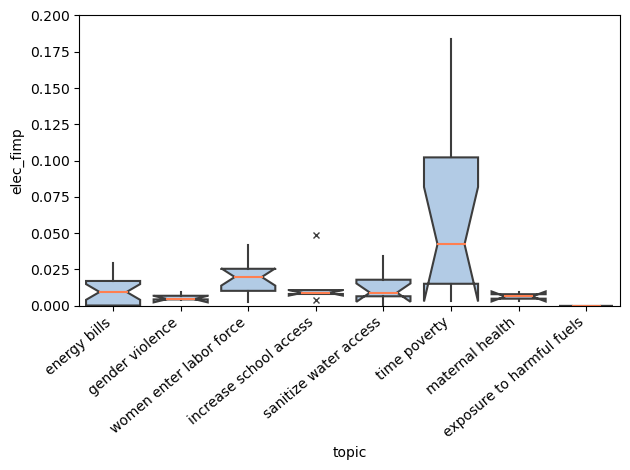

In [51]:
b= sns.boxplot(
    data=feature_imp_q_t_df, x="topic", y="elec_fimp",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.ylim(0, 0.20)
plt.tight_layout()
plt.show()

### 4.3 Analysis of the results of the section

In this section, we try to evaluate how the hours of available electriticy correlated with expected benefits from electrification. Given the amount of columns, many of which are highly correlated, and also hard to categorize, we opted to use a self supervised approach to grop questions into predefined buckets. We analyse the distribution of contributions of electricity to each impact by ploting a boxplot per benefit. The analyis show that electrification most clear contributions are : a reduction in time poverty, an increase of women into the labor force, a reduction on energy bills and increase access to sanitize water. We do not see significant changes on gender violence, maternal health or expousure to harmful fuels. It is imporant to note that some outliers appear, particularly on school access that are worth exploring.

### 5. Concluding remarks

* Thanks to data profiling, we identified the required processing steps, mainly dealing with empty or not responses, as well as some columns not properly categorize as numerical.

* For free text responses, we use first sentence embeddings and then kmeans clusrering, we were able to group key problems and benefits reported by panels from having/not having electricity access

* We use random forests to detect which panels respond in unpredictable ways on questions that we can predict well, and find between 1-6 respondents that are suspicious of respond in inchoerent ways with more than 2 unexpected responses

* In order to assess the impact of electrification on all potential benefits, we first group questions by topic using again sentence embeddings, and later try to predict the impact of electriticy on this themes removing correlated variables and metadata from the scope

* We identify that electrification is a significant contributor of many of the expected benefits on this data, with a very robust contribution on time poverty, women inclusion to labor force and reduced energy bills. This shows the importance to gather that data and the quality of the data set, as its results match the research on the topic.



### 6. Limitations of this work

1. Given the limited time and lack of domain knowledge, the proposed solution is heavily self supervised, and the results of the clustering and grouping are entirely based on the data.
2. Point 1 is a strength as most of the workflow here can we use in other data sets with very little changes, assumming they refer to electrification. 
3. Point 1 is also a weakness in the sense that it does not have domain validation, beyond the expected benefits found in the literature.
4. The notebook is rather long and should ideally we leveraging a package where instead of code snippeds duplication, functions with generic parameters are required, as well as unit testing of such functions to validate the quality of the code
5. For the sake of time, a random forest that is categorical has been used, which is not ideal for continous target variables.
6. For the identification of the suspicious panels, once has to careful choose the threshold in order to filter potential false responses. In this case between 1 and 5 suspicious respondents have been identified, but not filtered to the impacts estimation.
7. It is recommended to filter out clear suspcious panels, here the goal was to offer a detector but it was not used in the impact analysis given the fact that for this data set very few respondents were clearly responding in not expected ways, and if so on many few columns


### 7. Proposed next steps

1. Validation of the conclusions with related work, or the other data set
2. Refactor the code, unit testing and peer review to detect bugs
3. Addition to random forests that deal well with categorical and continous variables
4. Use grid search to detect the optimal number of trees in the random forests
5. Use waterfall anaylsis or shapiro values to assess the impact of increase access to electricity to the topics mapped
6. Unified the questions related to the same benefit to model easily impacts
7. Deep dive into the impact of other variables, and the actual causality of electrification (leveraging Judeal Pearl work)

# It was very fun doing it, thanks for taking the time for the review!!!